In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data set and displaying each feature
data=pd.read_csv('AIdataProject.csv')
enrollmentData = data.copy()
enrollmentData.head()

,ID,Enrolled,In AW,State,Zip,Country,HS GPA,ACT,SAT,Class,...,Scholarships,Honors,Athlete,International,First Generation,Gateway,Ethnicity,Gender,First Time Freshman,New Transfer
0,638388,Y,No,IL,62049-3436,United States of America,3.82,20.0,1040.0,Senior,...,750.0,Y,N,N,N,N,White,M,N,N
1,638389,Y,No,IL,62550-8536,United States of America,3.98,31.0,NaN,Senior,...,NaN,Y,N,N,N,N,White,M,N,N
2,638390,Y,Yes,NaN,900107,Nigeria,NaN,NaN,NaN,Sophomore,...,NaN,Y,N,Y,N,N,International,F,N,N
3,638391,Y,Yes,IL,62454-5840,United States of America,3.97,25.0,1210.0,Sophomore,...,NaN,Y,N,N,Y,N,White,M,N,Y
4,638392,Y,No,IL,61938-8710,United States of America,4.00,26.0,1230.0,Senior,...,6500.0,Y,N,N,N,N,White,M,N,N


In [3]:
#normalizing the data
#deleting useless columns
#explain in the project report
enrollmentData.drop(columns=['Graduation Term'], inplace = True) #only people who are enrolled have this, so basically a class label
enrollmentData.drop(columns=['ID'], inplace = True) #everyone has an unique number
enrollmentData.drop(columns=['Class'], inplace = True) #since we are only looking at who enrolles vs not classes don't matter since they are enrolled.
enrollmentData.drop(columns=['Gateway'], inplace = True) #all evalues are the same for everyone

#dropping new freshman and new transfer, Since this only applies to the current freshmand and transfers and not from a year ago.
enrollmentData.drop(columns=['First Time Freshman'], inplace = True)
enrollmentData.drop(columns=['New Transfer'], inplace = True)

#for theses money columns from fasfa and stuff we will group them by $1000s
# enrollmentData.drop(columns=['EFC/SAI'], inplace = True)
enrollmentData['EFC/SAI'] = enrollmentData['EFC/SAI'].fillna(0)
enrollmentData['EFC/SAI'] = (enrollmentData['EFC/SAI'] // 1000).astype(int)

# enrollmentData.drop(columns=['Pell'], inplace = True)
enrollmentData['Pell'] = enrollmentData['Pell'].fillna(0)
enrollmentData['Pell'] = (enrollmentData['Pell'] // 1000).astype(int)

# enrollmentData.drop(columns=['Grants'], inplace = True)
enrollmentData['Grants'] = enrollmentData['Grants'].fillna(0)
enrollmentData['Grants'] = (enrollmentData['Grants'] // 1000).astype(int)

# enrollmentData.drop(columns=['Scholarships'], inplace = True)
enrollmentData['Scholarships'] = enrollmentData['Scholarships'].fillna(0)
enrollmentData['Scholarships'] = (enrollmentData['Scholarships'] // 1000).astype(int)



#simple mapping data
binary_map = {'Y': 1, 'N': 0}
enrollmentData['Enrolled'] = enrollmentData['Enrolled'].map(binary_map)
enrollmentData['International'] = enrollmentData['International'].map(binary_map)
enrollmentData['Honors'] = enrollmentData['Honors'].map(binary_map)
enrollmentData['First Generation'] = enrollmentData['First Generation'].map(binary_map)
#enrollmentData.drop(columns=['Athlete'], inplace = True)
enrollmentData['Athlete'] = enrollmentData['Athlete'].map(binary_map)

in_aw_map = {'Yes' : 1, 'No' : 0}
enrollmentData['In AW']= enrollmentData['In AW'].map(in_aw_map)

ethnicity_map = {'White': 1, 'Black or African American': 2, 'Hispanic': 3, 'Asian': 4, 
                 'International': 5, 'Multiple': 6, 'Unknown/Not reported': 7}
enrollmentData['Ethnicity'] = enrollmentData['Ethnicity'].map(ethnicity_map)

gender_map = {'M': 0, 'F': 1}
enrollmentData['Gender'] = enrollmentData['Gender'].map(gender_map)

#dropping rows that have majors that aren't Computer Science, MAT: Teacher, Mathematics
#since we are looking at only computer science and Math.
#bad_majors = enrollmentData[(enrollmentData['Major'] == 'Computer and Info Technology') |
#                            (enrollmentData['Major'] == 'Bus Analytics & Info Systems') |
#                            (enrollmentData['Major'] == 'Elementary Education') |
#                            (enrollmentData['Major'] == 'Theatre')].index
#enrollmentData.drop(bad_majors, inplace = True)
major_map = {'Computer Science': 1, 'MAT: Teacher Education': 2, 'Mathematics': 3, 
             'Computer Science, Mathematics': 4, 'Computer and Info Technology': 5,
            'Bus Analytics & Info Systems': 6, 'Elementary Education': 7, 'Theatre': 8 }
enrollmentData['Major'] = enrollmentData['Major'].map(major_map)

#merging GPA, SAT, and HS GPA into one column. Based on intervels
#since international students won't have a value for GPA, SAT, ACT we will just set each one to the middle average
fill_international_values = {'SAT' : 1000, 'ACT' : 20, 'HS GPA' : 3.40}

#setting missing value for international students to the average, we choose average since it where they will most likely
for col, value in fill_international_values.items():
    enrollmentData.loc[enrollmentData['International'] == 'Y', col] = enrollmentData.loc[enrollmentData['International'] == 'Y', col].fillna(value)

#will any missing values with zero in ACT, GPA, SAT
enrollmentData[['ACT', 'SAT', 'HS GPA']] = enrollmentData[['ACT', 'SAT', 'HS GPA']].fillna(0)

#apply the grade mapping for each ACT, SAT, and GPA
    #mapping ACT
enrollmentData['ACT'] = np.where(enrollmentData['ACT'].between(0,18), 1, enrollmentData['ACT'])
enrollmentData['ACT'] = np.where(enrollmentData['ACT'].between(19,21), 2, enrollmentData['ACT'])
enrollmentData['ACT'] = np.where(enrollmentData['ACT'].between(22,37), 3, enrollmentData['ACT'])
    #mapping SAT
enrollmentData['SAT'] = np.where(enrollmentData['SAT'].between(0,890), 1, enrollmentData['SAT'])
enrollmentData['SAT'] = np.where(enrollmentData['SAT'].between(900,1120), 2, enrollmentData['SAT'])
enrollmentData['SAT'] = np.where(enrollmentData['SAT'].between(1130,1610), 3, enrollmentData['SAT'])
    #mapping HS GPA
enrollmentData['HS GPA'] = np.where(enrollmentData['HS GPA'].between(0,3.38), 1, enrollmentData['HS GPA'])
enrollmentData['HS GPA'] = np.where(enrollmentData['HS GPA'].between(3.39,3.48), 2, enrollmentData['HS GPA'])
enrollmentData['HS GPA'] = np.where(enrollmentData['HS GPA'].between(3.49,5), 3, enrollmentData['HS GPA'])

#will any missing values with zero in ACT, GPA, SAT
enrollmentData[['ACT', 'SAT', 'HS GPA']] = enrollmentData[['ACT', 'SAT', 'HS GPA']].fillna(0)

#now we create a new feature called academic and put the highest value from ACT, SAT, and HS GPA into it
#enrollmentData['Academic'] = enrollmentData[['ACT','SAT','HS GPA']].values.max(1)

#dropping column ACT, SAT, and HS GPA
#enrollmentData.drop(columns=['ACT'], inplace = True)
#enrollmentData.drop(columns=['SAT'], inplace = True)
#enrollmentData.drop(columns=['HS GPA'], inplace = True)


#merging location data to a new feature
#Extract first 3 digits of ZIP, only need Illinois and its regions (first 3)
enrollmentData['ZIP3'] = pd.to_numeric(enrollmentData['Zip'].astype(str).str[:3], errors='coerce')
#majority of students who enroll and attend EIU are in illinois so we split our data by the regions using zip codes.
def illinois_zip_assigning(x):
    if pd.isnull(x):
        return 8
    x = int(x)
    if 600 <= x <= 605: #chicago Land zips
        return 1
    elif 606 <= x <= 608: #chicago zips
        return 2
    elif 609 <= x <= 613: #northern zips
        return 3
    elif 614 <= x <= 616 or x in [623, 625]: #Western zips
        return 4
    elif 624 <= x <= 627 or 617 <= x <= 619: #centeral zips
        return 5
    elif x in [620, 622]: #southwest zips
        return 6
    elif x in [628, 629]: # southern zips
        return 7
    else: #out of state or international students.
        return 8

enrollmentData['Location'] = enrollmentData['ZIP3'].apply(illinois_zip_assigning)
#international student will have a different value from out of state
enrollmentData.loc[enrollmentData['International'] == 1, 'Location'] = 9

#dropping values used for location or relate to it.
enrollmentData.drop(columns=['Zip'], inplace = True)
enrollmentData.drop(columns=['ZIP3'], inplace = True)
enrollmentData.drop(columns=['State'], inplace = True)
enrollmentData.drop(columns=['International'], inplace = True)
enrollmentData.drop(columns=['Country'], inplace = True)
enrollmentData.drop(columns=['High School County'], inplace = True)

In [4]:
enrollmentData['Enrolled'].value_counts()

Enrolled
0    248
1    132
Name: count, dtype: int64

In [5]:
enrollmentData.head()

,Enrolled,In AW,HS GPA,ACT,SAT,Major,EFC/SAI,Pell,Grants,Scholarships,Honors,Athlete,First Generation,Ethnicity,Gender,Location
0,1,0,3.0,2.0,2.0,5,12,0,0,0,1,0,0,1,0,6
1,1,0,3.0,3.0,1.0,1,0,0,0,0,1,0,0,1,0,4
2,1,1,1.0,1.0,1.0,6,0,0,0,0,1,0,0,5,1,9
3,1,1,3.0,3.0,3.0,5,51,0,0,0,1,0,1,1,0,5
4,1,0,3.0,3.0,3.0,1,4,1,5,6,1,0,0,1,0,5


In [6]:
enrollmentData['EFC/SAI'].value_counts()

EFC/SAI
0      328
2        9
4        4
3        4
5        3
8        3
12       2
16       2
32       2
11       1
26       1
18       1
56       1
29       1
48       1
89       1
9        1
1        1
13       1
66       1
20       1
46       1
90       1
146      1
19       1
34       1
21       1
6        1
37       1
22       1
51       1
23       1
Name: count, dtype: int64

In [7]:
enrollmentData['Pell'].value_counts()

Pell
0    339
7     16
3      8
1      5
2      4
4      4
6      2
5      2
Name: count, dtype: int64

In [8]:
enrollmentData['Grants'].value_counts()

Grants
0     333
15      9
14      7
10      5
7       4
11      3
5       3
3       2
12      2
8       2
1       2
20      1
4       1
23      1
18      1
9       1
13      1
6       1
16      1
Name: count, dtype: int64

In [9]:
enrollmentData['Scholarships'].value_counts()

Scholarships
0     323
2      14
4       7
3       7
9       5
1       5
5       4
8       3
10      3
7       2
27      1
12      1
11      1
29      1
6       1
16      1
15      1
Name: count, dtype: int64

Now we can work on each classifiers.
1) get an array of each hyper parameter and perform a gridSearch to find the best/optimized version of it
2) fit it an evaluate it using a confusion matrix
3) See if we can fix it by making changes to our data (getting some columns back)

In [11]:
#importing everything we need for each different type of classifier... WOW IT'S A LOT
    #data/training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer, MinMaxScaler
from sklearn.preprocessing import StandardScaler
    #SVM
from sklearn.svm import SVC
    #NaiveBays
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
    #Decision Tree
from sklearn.tree import DecisionTreeClassifier
    #KNN
from sklearn.neighbors import KNeighborsClassifier
    #report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image

#Random Forest/ Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

#albation test
from sklearn.base import clone

 #report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image

import graphviz
import seaborn as sns

In [12]:
#splitting the data
#doing a 80,20 split
x = enrollmentData.drop('Enrolled', axis=1)
y = enrollmentData['Enrolled']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain_samples = x_train.shape[0]
xtest_samples = x_test.shape[0]
print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 304 samples for training and 76 samples for testing.


In [13]:
#creating a function to perform a grid_search on models
def tune_and_evaluate(model, param_grid, x_train, x_test, y_train, y_test, scoring='recall', cv=5):
    print(f"Starting GridSearchCV for {model.__class__.__name__}...")
    
    # Clone the model to avoid overwriting outside
    model_clone = clone(model)
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(
        estimator=model_clone,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(x_train, y_train)
    # Get the best C value
    best_params = grid_search.best_params_
    print(f"Best parameters: {best_params}")

    # Special handling: if using SVM and we want probability=True for later Voting
    if isinstance(model, SVC):
        best_params['probability'] = True

    # Create and train the best model
    best_model = clone(model).set_params(**best_params)
    best_model.fit(x_train, y_train)

    # Predictions and Evaluation/displaying confusion Matrix
    y_pred = best_model.predict(x_test)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    print(classification_report(y_test, y_pred))

    return best_model, best_params, recall

#
all_results = []

Starting GridSearchCV for SVC...
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        42
           1       0.92      0.71      0.80        34

    accuracy                           0.84        76
   macro avg       0.86      0.83      0.83        76
weighted avg       0.86      0.84      0.84        76



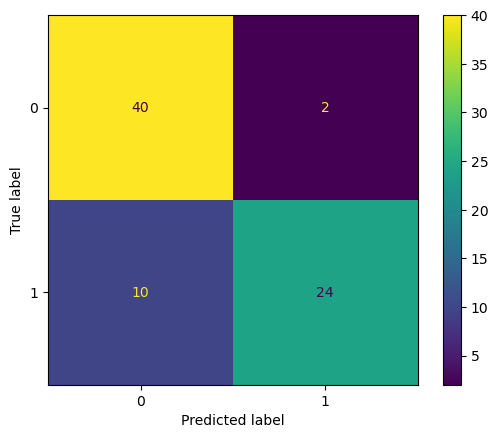

In [14]:
#SVM
#variety hyper parameters to find the best one
svm_param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}, #linear kernel does not use gamma
    {'kernel': ['rbf', 'poly', 'sigmoid'], 
     'C': [0.01, 0.1, 1, 10, 100], 
     'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
]

svm_best, svm_best_params, svm_recall = tune_and_evaluate(SVC(), svm_param_grid, x_train, x_test, y_train, y_test)
all_results.append({'Model': 'SVM', 'Type': 'Normal', 'Recall': svm_recall})

Starting GridSearchCV for SVC...
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        42
           1       0.92      0.71      0.80        34

    accuracy                           0.84        76
   macro avg       0.86      0.83      0.83        76
weighted avg       0.86      0.84      0.84        76



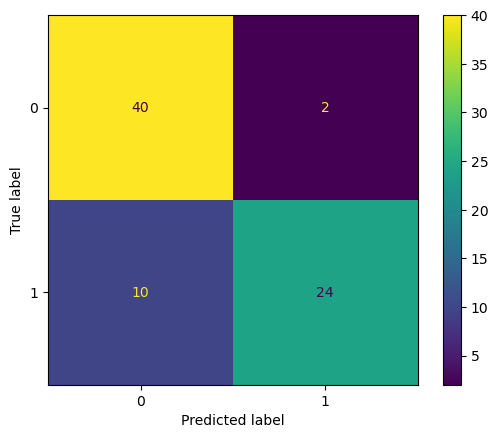

In [15]:
#SVM, but using StratifiedKFold since we have over double the amound of not enrolled in dataset
#imbalance data
from sklearn.model_selection import StratifiedKFold

#stratifiedKFold keeps the same distribution of classes in each test set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_best, skf_best_params, recall = tune_and_evaluate(SVC(), svm_param_grid, x_train, x_test, y_train, y_test, cv=skf)
all_results.append({'Model': 'SKF SVM', 'Type': 'Normal', 'Recall': recall})

Starting GridSearchCV for SVC...
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.85      0.85      0.85        34

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



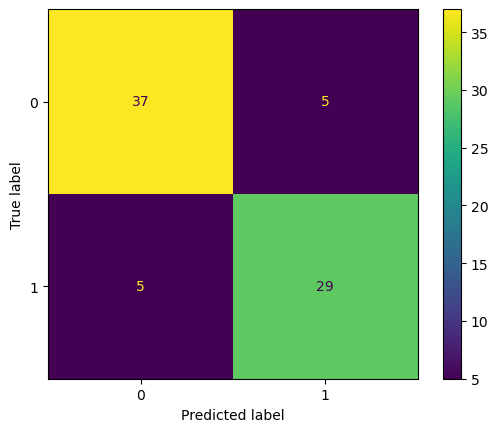

In [16]:
#Trying SMOTE to fix the imbalance version of our data!
from imblearn.over_sampling import SMOTE

#creating 'fake values' to try to balance our class labels
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#SVM with class_weight to keep balancing effects even after SMOTE
svm = SVC(class_weight='balanced')

smote_model, smote_best_params, recall = tune_and_evaluate(svm, svm_param_grid, x_train_smote, x_test, y_train_smote, y_test, cv=skf)
all_results.append({'Model': 'Smote SVM', 'Type': 'Normal', 'Recall': recall})

Starting GridSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 2430 candidates, totalling 12150 fits
Best parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        42
           1       0.88      0.68      0.77        34

    accuracy                           0.82        76
   macro avg       0.83      0.80      0.81        76
weighted avg       0.83      0.82      0.81        76



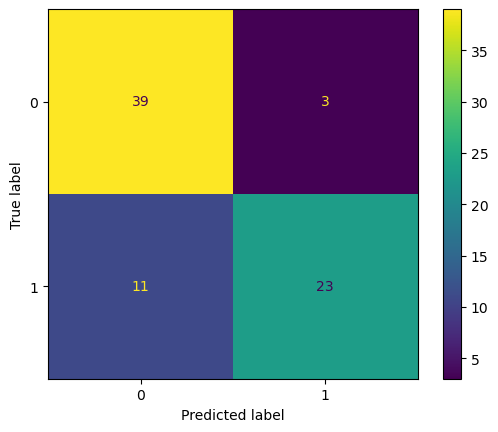

In [17]:
#decision trees
tree = DecisionTreeClassifier(random_state=42)
tree_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # impurity measures
    'max_depth': [None, 3, 5, 10, 20],             # limits how deep the tree can go
    'min_samples_split': [2, 5, 10],               # minimum # of samples to split a node
    'min_samples_leaf': [1, 2, 4],                 # minimum # of samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],        # number of features to consider at each split
    'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

best_tree, best_tree_params, recall = tune_and_evaluate(tree, tree_param_grid, x_train, x_test, y_train, y_test)
all_results.append({'Model': 'D Tree', 'Type': 'Normal', 'Recall': recall})

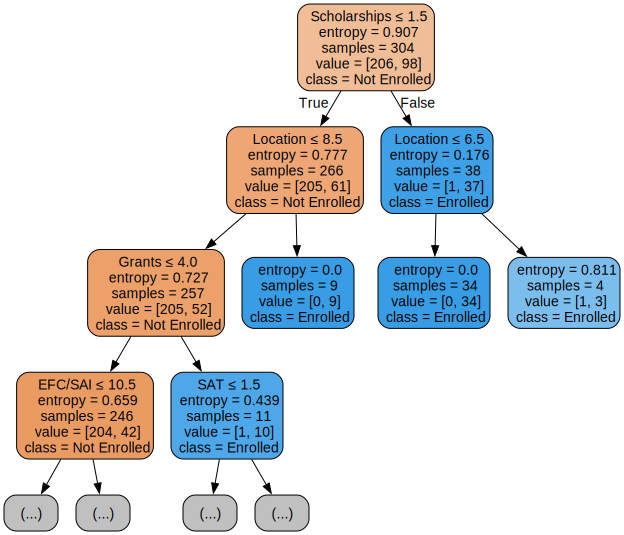

In [18]:
#graphing the best tree
#displaying our tree
dot_data = export_graphviz(
    best_tree,
    out_file=None, 
    feature_names= x_train.columns,
    class_names= ['Not Enrolled', 'Enrolled'],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)
graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', format='png', cleanup=True)
display(graph)

Tuning MultinomialNB...
Starting GridSearchCV for Pipeline...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'clf__alpha': 0.01, 'clf__fit_prior': False}
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        42
           1       1.00      0.62      0.76        34

    accuracy                           0.83        76
   macro avg       0.88      0.81      0.81        76
weighted avg       0.87      0.83      0.82        76

Tuning BernoulliNB...
Starting GridSearchCV for Pipeline...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'clf__alpha': 0.01, 'clf__fit_prior': True}
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        42
           1       1.00      0.65      0.79        34

    accuracy                           0.84        76
   macro avg       0.89      0.82      0.83        76
weighted avg       0.88      0.84 

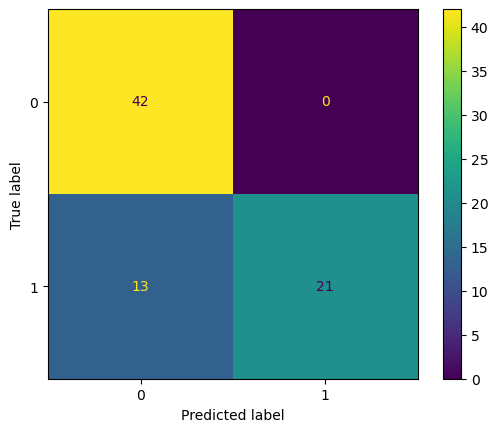

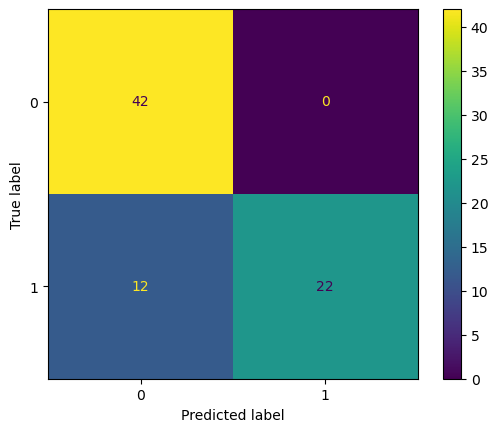

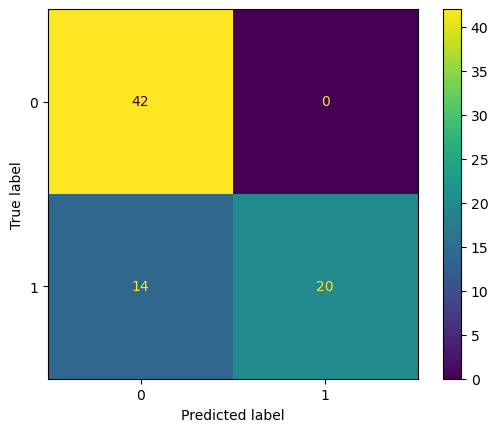

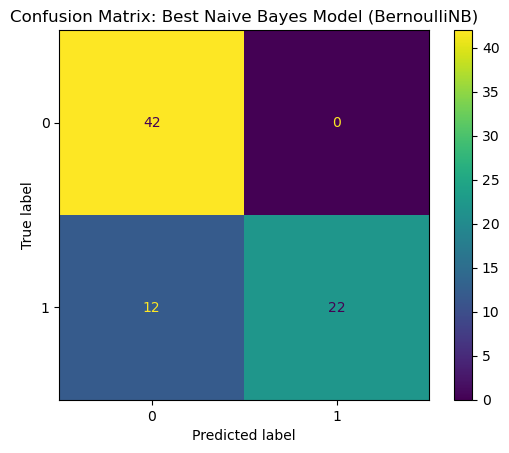

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        42
           1       1.00      0.65      0.79        34

    accuracy                           0.84        76
   macro avg       0.89      0.82      0.83        76
weighted avg       0.88      0.84      0.84        76



In [19]:
# Define pipelines and param grids for Naive Bayes models
models = {
    'MultinomialNB': (
        Pipeline([
            ('scale', MinMaxScaler()),  # Ensure non-negative features
            ('clf', MultinomialNB())
        ]),
        {
            'clf__alpha': [0.01, 0.1, 1.0, 10.0],
            'clf__fit_prior': [True, False]
        }
    ),
    'BernoulliNB': (
        Pipeline([
            ('binarize', Binarizer()),  # Binary features
            ('clf', BernoulliNB())
        ]),
        {
            'clf__alpha': [0.01, 0.1, 1.0, 10.0],
            'clf__fit_prior': [True, False]
        }
    ),
    'GaussianNB': (
        Pipeline([
            ('scale', MinMaxScaler()),  # Numerical stability
            ('clf', GaussianNB())
        ]),
        {
            'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    )
}

# Tune and evaluate each model
best_models = {}
best_params = {}

for name, (pipeline, param_grid) in models.items():
    print(f"Tuning {name}...")
    best_model, params, recall = tune_and_evaluate(pipeline, param_grid, x_train, x_test, y_train, y_test)
    all_results.append({'Model': name, 'Type': 'Normal', 'Recall': recall})
    best_models[name] = best_model
    best_params[name] = params

# Pick the best Naive Bayes model overall (based on recall)
scores = {}
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    scores[name] = recall_score(y_test, y_pred)

best_model_type = max(scores, key=scores.get)
bestNB = best_models[best_model_type]

# Display final evaluation
y_bayes_pred = bestNB.predict(x_test)
bayes_cm = confusion_matrix(y_test, y_bayes_pred)
ConfusionMatrixDisplay(confusion_matrix=bayes_cm).plot()
plt.title(f"Confusion Matrix: Best Naive Bayes Model ({best_model_type})")
plt.show()
print(classification_report(y_test, y_bayes_pred))

# Optional: If you want direct access to each model separately
best_mnb = best_models['MultinomialNB']
best_bnb = best_models['BernoulliNB']
best_gnb = best_models['GaussianNB']


Starting GridSearchCV for Pipeline...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        42
           1       0.85      0.65      0.73        34

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.78        76



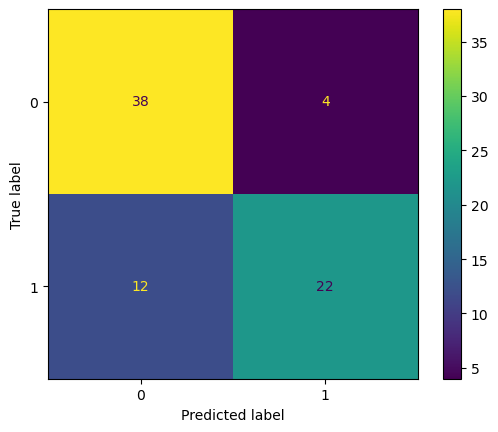

In [20]:
#KNN

param_grid_knn = {
    'clf__n_neighbors': list(range(1, 10)),  # try from 1 to 9 neighbors
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['minkowski', 'euclidean', 'manhattan'],
    'clf__p': [1, 2]  # optional if using minkowski
}

pipeline_knn = Pipeline([('scale', StandardScaler()), #making sure one feature doesn't dominate
                        ('clf', KNeighborsClassifier())])

best_knn, best_knn_params, recall = tune_and_evaluate(pipeline_knn, param_grid_knn, x_train, x_test, y_train, y_test)
all_results.append({'Model': 'KNN', 'Type': 'Normal', 'Recall': recall})

Starting GridSearchCV for Pipeline...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'clf__bootstrap': False, 'clf__class_weight': 'balanced', 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 2000}
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        42
           1       1.00      0.74      0.85        34

    accuracy                           0.88        76
   macro avg       0.91      0.87      0.88        76
weighted avg       0.90      0.88      0.88        76



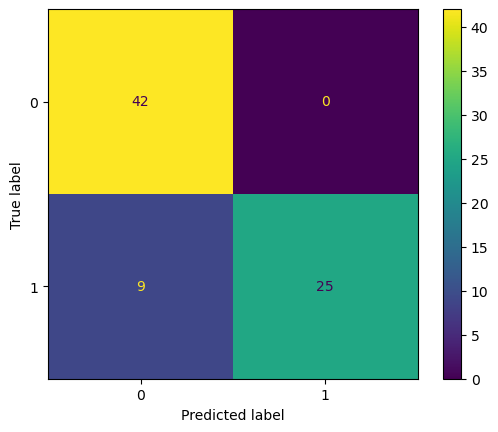

In [21]:
#Random forest
param_grid_rf = {
    'clf__n_estimators': [100, 1000, 2000],             # number of trees
    'clf__max_depth': [3, 5],                # how deep the trees can go
    'clf__min_samples_split': [2, 5, 10],             # min samples to split a node
    'clf__min_samples_leaf': [1, 2, 4],               # min samples at a leaf
    'clf__max_features': ['sqrt', 'log2'],            # how many features to consider at each split
    'clf__bootstrap': [True, False],                  # whether to use bootstrapping
    'clf__class_weight': [None, 'balanced']           # useful for class imbalance
}

pipeline_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

best_rf, best_rf_params, recall = tune_and_evaluate(pipeline_rf, param_grid_rf, x_train, x_test, y_train, y_test)
all_results.append({'Model': 'Forest', 'Type': 'Normal','Recall': recall})

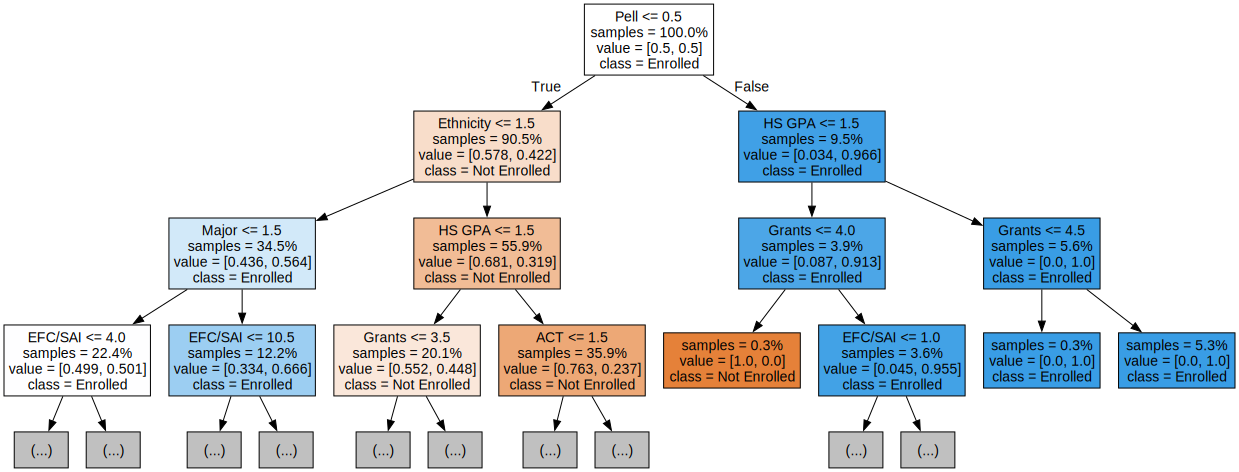

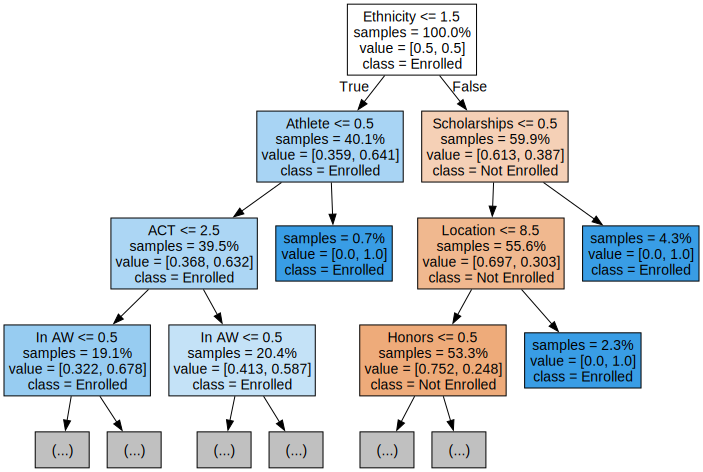

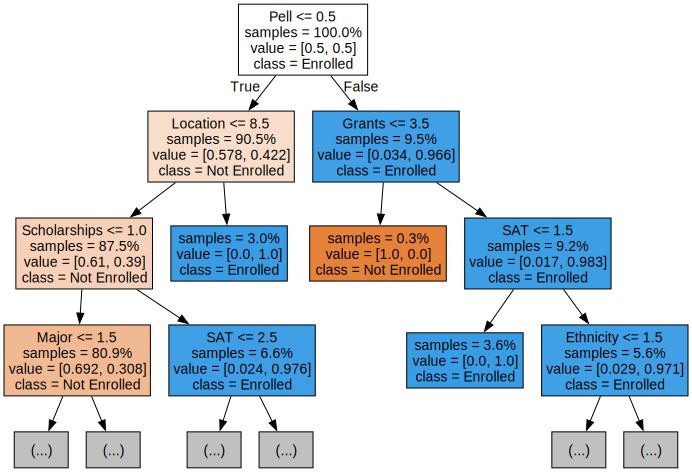

In [22]:
#display a couple of the trees to see if they differ
for i in range(3):
    tree = best_rf.named_steps['clf'].estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               class_names=['Not Enrolled','Enrolled'],
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True,
                                )
    graph = graphviz.Source(dot_data)
    graph.render(filename='random_tree'+str(i), format='png', cleanup=True)
    display(graph)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        42
           1       1.00      0.68      0.81        34

    accuracy                           0.86        76
   macro avg       0.90      0.84      0.85        76
weighted avg       0.89      0.86      0.85        76



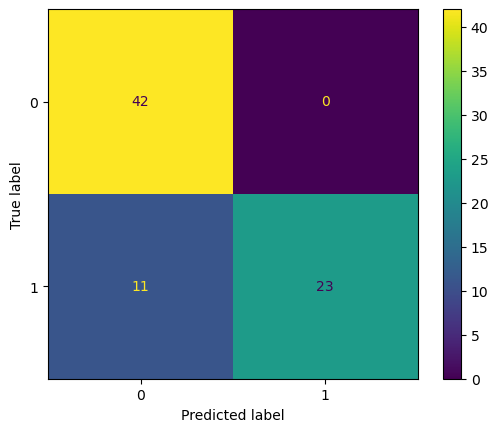

In [23]:
#voting based from our 'best' classifiers
voting_clf = VotingClassifier(
    estimators= [('SMV', svm_best),
                 ('SmoteSVM', smote_model),
                 ('SVStratSVMM', skf_best),
                 ('DTree', best_tree),
                 ('Knn', best_knn),
                 ('mnb', best_mnb),
                ('bnb', best_bnb),
                ('gnb', best_gnb)],
    voting= 'soft'
)

voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)
recall = recall_score(y_test, y_pred_voting)
all_results.append({'Model': 'Voting', 'Type': 'Normal','Recall': recall})

vote_cm = confusion_matrix(y_test,y_pred_voting)
ConfusionMatrixDisplay(confusion_matrix=vote_cm).plot();
print(classification_report(y_test,y_pred_voting))

           Model  Accuracy  F1 Score  Precision    Recall
4       SmoteSVM  0.868421  0.852941   0.852941  0.852941
8    Random Tree  0.881579  0.847458   1.000000  0.735294
3            SVM  0.842105  0.800000   0.923077  0.705882
5    SVStratSVMM  0.842105  0.800000   0.923077  0.705882
6          DTree  0.815789  0.766667   0.884615  0.676471
9         Voting  0.855263  0.807018   1.000000  0.676471
1    BernoulliNB  0.842105  0.785714   1.000000  0.647059
7            Knn  0.789474  0.733333   0.846154  0.647059
0  MultinomialNB  0.828947  0.763636   1.000000  0.617647
2     GaussianNB  0.815789  0.740741   1.000000  0.588235


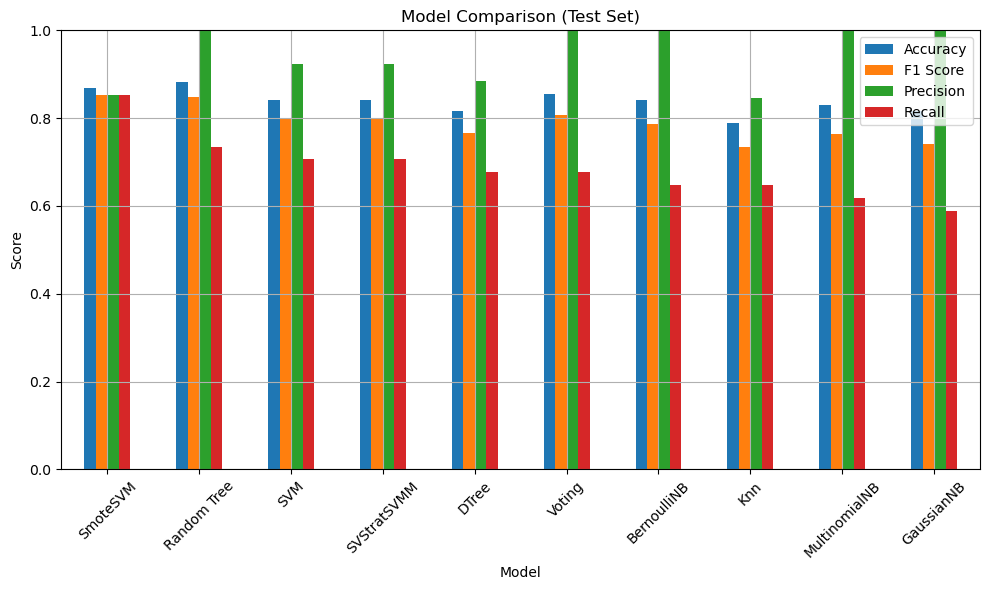

In [24]:
#compare all the models with each other.
best_models['SVM'] = svm_best
best_models['SmoteSVM'] = smote_model
best_models['SVStratSVMM'] = skf_best
best_models['DTree'] = best_tree
best_models['Knn'] = best_knn
best_models['Random Tree'] = best_rf
best_models['Voting'] = voting_clf

results = []

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print(results_df)

# Plot leaderboard
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), title='Model Comparison (Test Set)', ylim=(0,1))
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Now we will use an albation test to see if any of the features are holding our classifiers performance back. We will remove the features one by one and see the different in performance from the orginal best models. This will allow us to remove features that aren't important to learning. Hopefully after we can re-tune the classifiers to have better performance from before. 

Initial Recalls: {'MultinomialNB': 0.6176470588235294, 'BernoulliNB': 0.6470588235294118, 'GaussianNB': 0.5882352941176471, 'SVM': 0.7058823529411765, 'SmoteSVM': 0.08823529411764706, 'SVStratSVMM': 0.7058823529411765, 'DTree': 0.6764705882352942, 'Knn': 0.6470588235294118, 'Random Tree': 0.7352941176470589, 'Voting': 0.6764705882352942}
Without: ['In AW']
Without: ['HS GPA']
Without: ['ACT']
Without: ['SAT']
Without: ['Major']
Without: ['EFC/SAI']
Without: ['Pell']
Without: ['Grants']
Without: ['Scholarships']
Without: ['Honors']
Without: ['Athlete']
Without: ['First Generation']
Without: ['Ethnicity']
Without: ['Gender']
Without: ['Location']

Ablation Results:
         Classifier Removed Feature  Change in Recall
0    MultinomialNB           In AW         -0.029412
1      BernoulliNB           In AW          0.000000
2       GaussianNB           In AW          0.000000
3              SVM           In AW          0.058824
4         SmoteSVM           In AW          0.000000
..       

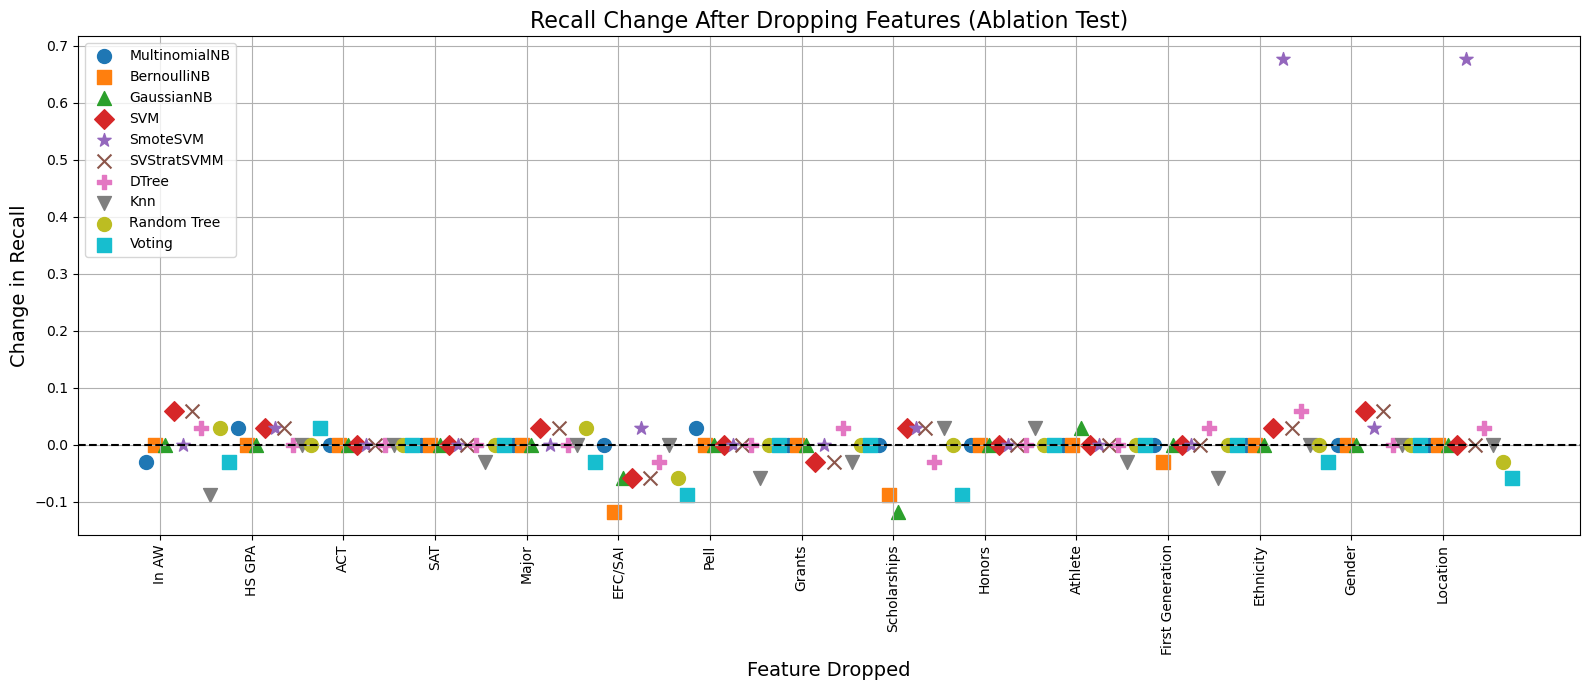

In [26]:
#performing a simple ablation test for each classifier.
#testing importants of features

from sklearn.base import clone
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score

# Ablation Test Function
def ablation_test(classifiers, x_train, x_test, y_train, y_test, features, step=1):
    initial_results = {}
    for name, classifier in classifiers.items():
        clone_classifier = clone(classifier)
        clone_classifier.fit(x_train, y_train)
        y_pred = clone_classifier.predict(x_test)
        initial_results[name] = recall_score(y_test, y_pred)
    print("Initial Recalls:", initial_results)

    features_score = []

    for i in range(0, len(features), step):
        fDrop = features[i:i+step]
        print(f"Without: {fDrop}")

        new_x_train = x_train.drop(columns=fDrop)
        new_x_test = x_test.drop(columns=fDrop)

        for name, classifier in classifiers.items():
            clone_classifier = clone(classifier)
            clone_classifier.fit(new_x_train, y_train)
            y_pred = clone_classifier.predict(new_x_test)
            score = recall_score(y_test, y_pred)
            importance = score - initial_results[name]

            features_score.append({
                'Classifier': name, 
                'Removed Feature': ','.join(fDrop), 
                'Change in Recall': importance
            })

    results = pd.DataFrame(features_score)
    print("\nAblation Results:\n", results)

    # Create a mapping for features to numbers (to plot with small offsets)
    feature_to_num = {feature: idx for idx, feature in enumerate(results['Removed Feature'].unique())}

    plt.figure(figsize=(16, 7))
    markers = ['o', 's', '^', 'D', '*', 'x', 'P', 'v']

    for idx, name in enumerate(results['Classifier'].unique()):
        subset = results[results['Classifier'] == name]
        x = [feature_to_num[feat] + (idx - 1.5) * 0.1 for feat in subset['Removed Feature']]  # small offset per model
        plt.scatter(x, subset['Change in Recall'], label=name, marker=markers[idx % len(markers)], s=100)

    plt.title('Recall Change After Dropping Features (Ablation Test)', fontsize=16)
    plt.xlabel('Feature Dropped', fontsize=14)
    plt.ylabel('Change in Recall', fontsize=14)
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(ticks=list(feature_to_num.values()), labels=list(feature_to_num.keys()), rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return results
# Now run it
feature_names = x_train.columns.tolist()
ablation_results = ablation_test(best_models, x_train, x_test, y_train, y_test, feature_names)

albated_models = {}
recall_results = []

We are going to revaluate the models and removing features based off the albation test. We are going to use the same testing with the gridSearch to tune the hyperparameters. Hopefully we can make our models better! The features we will remove are whiche feature point for a model is above the x-axis, which means model improved by removing it.

In [ ]:
#svm
# Find features that, when dropped, *improved* recall
model_ablation = ablation_results[ablation_results['Classifier'] == 'SVM']
svm_bad_features = model_ablation[model_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {svm_bad_features}")

# Drop those features from training data
x_train_pruned = x_train.drop(columns=svm_bad_features, errors='ignore')
x_test_pruned = x_test.drop(columns=svm_bad_features, errors='ignore')
#preforming a gridsearch
svm=SVC()
alb_best_svm, alb_svm_params, recall = tune_and_evaluate(svm, svm_param_grid, x_train_pruned, x_test_pruned, y_train, y_test)

all_results.append({'Model': 'Alb SVM', 'Type': 'Albated', 'Recall': recall})


Voting - Features to DROP: ['In AW', 'HS GPA', 'Major', 'Scholarships', 'Ethnicity', 'Gender']
Starting GridSearchCV for SVC...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
#Smote svm
#ACT, Major, Scharships
#enrollmentData.drop(columns=['Zip'], inplace = True)
# Find features that, when dropped, *improved* recall
SmoteSVM_ablation = ablation_results[ablation_results['Classifier'] == 'SmoteSVM']
bad_features = SmoteSVM_ablation[SmoteSVM_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")
# Drop those features from training data
x_train_pruned_Smoth = x_train_smote.drop(columns=bad_features, errors='ignore')
x_test_pruned_Smoth = x_test.drop(columns=bad_features, errors='ignore')
alb_best_smote, alb_smote_params, recall = tune_and_evaluate(SVC(class_weight='balanced'), svm_param_grid, x_train_pruned_Smoth, x_test_pruned_Smoth, y_train_smote, y_test)
all_results.append({'Model': 'Alb Smote SVM', 'Type': 'Albated', 'Recall': recall})

In [ ]:
#compare each models with their new model
#SVStratSVM
#maybe show/graph all models
SVStratSVM_ablation = ablation_results[ablation_results['Classifier'] == 'SVStratSVM']
bad_features = SVStratSVM_ablation[SVStratSVM_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")
# Drop those features from training data
x_train_pruned = x_train.drop(columns=bad_features, errors='ignore')
x_test_pruned = x_test.drop(columns=bad_features, errors='ignore')
alb_best_strat, alb_strat_params, recall = tune_and_evaluate(SVC(), svm_param_grid, x_train_pruned, x_test_pruned, y_train, y_test,cv=skf)
all_results.append({'Model': 'Alb Skt SVM', 'Type': 'Albated', 'Recall': recall})

In [ ]:
#MultinomialNB
MultinomialNB_ablation = ablation_results[ablation_results['Classifier'] == 'MultinomialNB']
bad_features = MultinomialNB_ablation[MultinomialNB_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")
# Drop those features from training data
x_train_pruned = x_train.drop(columns=bad_features, errors='ignore')
x_test_pruned = x_test.drop(columns=bad_features, errors='ignore')

pipline_mnb, param_grid_mnb = models['MultinomialNB']
alb_mnb, params, recall = tune_and_evaluate(pipline_mnb, param_grid_mnb, x_train_pruned, x_test_pruned, y_train, y_test)
all_results.append({'Model': 'Alb MNB', 'Type': 'Albated', 'Recall': recall})

In [ ]:
#BernoulliNB
BernoulliNB_ablation = ablation_results[ablation_results['Classifier'] == 'BernoulliNB']
bad_features = BernoulliNB_ablation[BernoulliNB_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")

In [ ]:
#GaussianNB
GaussianNB_ablation = ablation_results[ablation_results['Classifier'] == 'GaussianNB']
bad_features = GaussianNB_ablation[GaussianNB_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")

# Drop those features from training data
x_train_pruned = x_train.drop(columns=bad_features, errors='ignore')
x_test_pruned = x_test.drop(columns=bad_features, errors='ignore')

pipline_gnb, param_grid_gnb = models['GaussianNB']
a_gnb, params, recall = tune_and_evaluate(pipline_gnb, param_grid_gnb, x_train_pruned, x_test_pruned, y_train, y_test)

all_results.append({'Model': 'Alb GNB', 'Type': 'Albated', 'Recall': recall})

In [ ]:
#DTree
DTree_ablation = ablation_results[ablation_results['Classifier'] == 'DTree']
bad_features = DTree_ablation[DTree_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")
# Drop those features from training data
x_train_pruned = x_train.drop(columns=bad_features, errors='ignore')
x_test_pruned = x_test.drop(columns=bad_features, errors='ignore')

best_alb_tree, best_alb_tree_params, recall = tune_and_evaluate(tree, tree_param_grid, x_train_pruned, x_test_pruned, y_train, y_test)
all_results.append({'Model': 'Alb DTree', 'Type': 'Albated', 'Recall': recall})

In [ ]:
#Knn
Knn_ablation = ablation_results[ablation_results['Classifier'] == 'knn']
bad_features = Knn_ablation[Knn_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")

In [ ]:
#Random Tree
RT_ablation = ablation_results[ablation_results['Classifier'] == 'Random Tree']
bad_features = RT_ablation[RT_ablation['Change in Recall'] > 0]['Removed Feature'].tolist()
print(f"\n{name} - Features to DROP: {bad_features}")

best_rf_tree, best_rf_tree_params, recall = tune_and_evaluate(tree, tree_param_grid, x_train_pruned, x_test_pruned, y_train, y_test)
all_results.append({'Model': 'Alb Random Tree', 'Type': 'Albated', 'Recall': recall})

Now that we have our new albation models that removed features that negativily impacted the model we can graph the performance (recall) between the orginal models and their new albation version. Note that some models didn't have any features to drop.

In [ ]:
#iteration through our albation models and record the recall from them
results = pd.DataFrame(all_results)
results = results.sort_values('Recall', ascending= False)
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Recall', data=results, palette="viridis")
plt.title('Comparison of Recall: Original vs Ablated Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#showing the corrolation of features with the class. 
#we will show the features important using Dtree, Random tree, and linearly from our x_train data
corr_data = x_train.copy()
corr_data['Enrolled'] = y_train
corr_matrix = corr_data.corr()
target_corr = corr_matrix['Enrolled'].drop('Enrolled')

#setting up tree models for importance
rf_model = best_rf.named_steps['clf']
dtree_model = best_tree
rf_importance = pd.Series(rf_model.feature_importances_, index= x_train.columns)
dtree_importance = pd.Series(dtree_model.feature_importances_, index= x_train.columns)

fig, axes = plt.subplots(1, 3, figsize=(19, 6), sharey=True)

#plotting
#random forest
sns.barplot(x=rf_importance.values, y=rf_importance.index, ax=axes[0], palette='viridis')
axes[0].set_title("Random Forest Important")
axes[0].set_xlabel("Importance")
#Decision Tree
sns.barplot(x=dtree_importance.values, y=dtree_importance.index, ax=axes[1], palette='plasma')
axes[1].set_title("Decision Tree Important")
axes[1].set_xlabel("Importance")
axes[1].set_yticklabels(dtree_importance.index)
#correlation
sns.barplot(x=target_corr.values, y=target_corr.index, ax=axes[2], palette='coolwarm')
axes[2].set_title("Correlation Important")
axes[2].set_xlabel("Importance")
axes[2].set_yticklabels(target_corr.index)

plt.suptitle("Feature Importance & Correlation Comparison", fontsize=16)
plt.tight_layout()
plt.show()


The graphs are showing the important features used in random forest, decision tree, and a linear relationship to the class label. As we can see some values are similar, but different in random forest and decision tree from the correlation important. This could mean that the higher values for the plants based models are better in splitting. It also checks for threshold in decision and non-linear relationships.

Now we will test to see if some of our best models done some overfitting, We will plot a learning curve for SMOTH SVM, Random Forst, and regular SVM. We will also compare the train vs test metrics on the recall score. If they are similar that means our models are not overfit. If they have a high different WE ARE IN TROUBLE!

In [ ]:
#how we want to check if any of our models overfit, aka our best models making sure they are NOT lying to us!
#will plot a learning curve for a couple of models which will be our best models, SMOTHsvm, Alb SmothSVm, and Forest
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    smote_model, x_train, y_train, cv=5, scoring='recall', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Recall')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_train_pred = smote_model.predict(x_train)
y_test_pred = smote_model.predict(x_test)

train_score = recall_score(x_train, y_train)
test_score = recall_score(y_test, y_test_pred)

print(f"Train Recall: {train_score:.3f}")
print(f"Test Recall:  {test_score:.3f}")

In [ ]:
#Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x_train, y_train, cv=5, scoring='recall', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Recall')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

train_score = recall_score(y_train, y_train_pred)
test_score = recall_score(y_test, y_test_pred)

print(f"Train Recall: {train_score:.3f}")
print(f"Test Recall:  {test_score:.3f}")

In [ ]:
#SMV learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_best, x_train, y_train, cv=5, scoring='recall', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Recall')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_train_pred = svm_best.predict(x_train)
y_test_pred = svm_best.predict(x_test)

train_score = recall_score(y_train, y_train_pred)
test_score = recall_score(y_test, y_test_pred)

print(f"Train Recall: {train_score:.3f}")
print(f"Test Recall:  {test_score:.3f}")

In [ ]:
#saving some models, who knows if we will use them
import joblib
# Save a model
joblib.dump(svm_best, 'smote_svm_model.pkl')
joblib.dump(best_rf, 'random_forest_model.pkl')